In [ ]:
INTERNSHIP

In [1]:
!pip install textblob
!pip install wordcloud

✅ File loaded successfully!


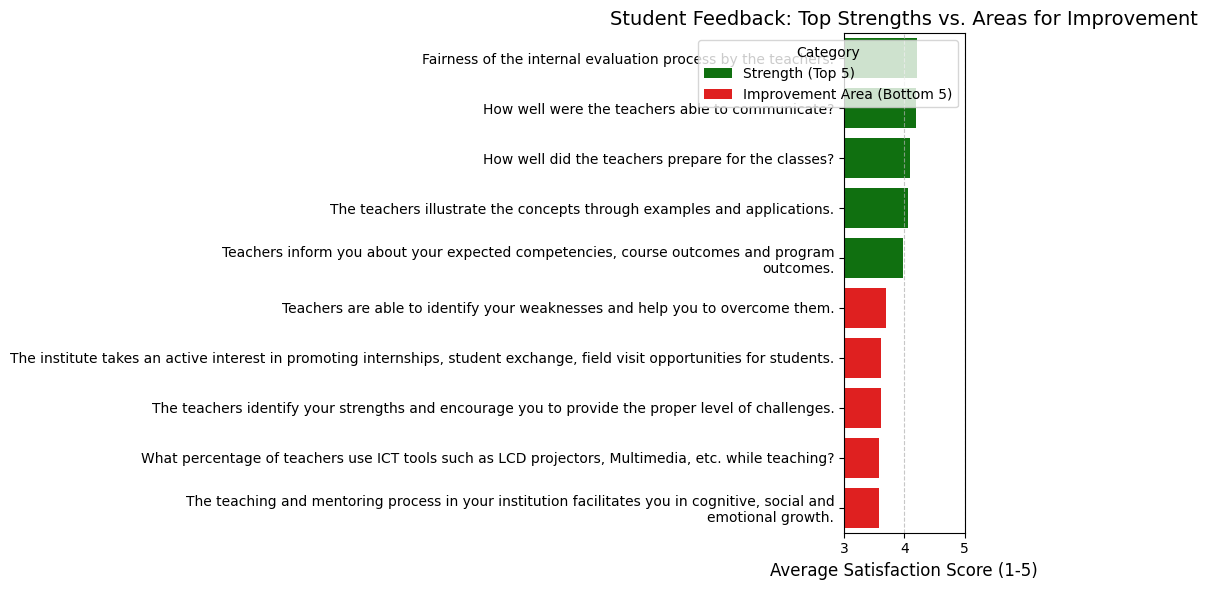

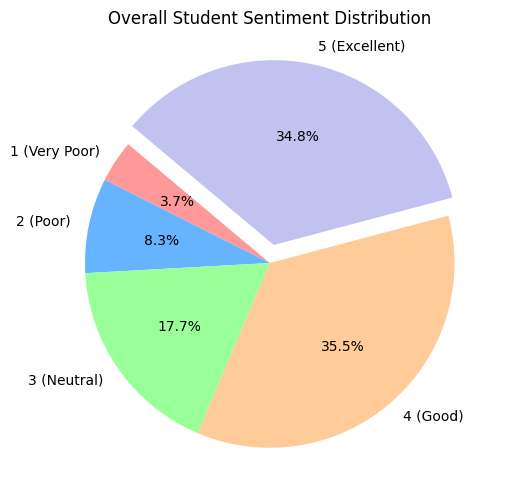


--- Key Insights for Your Report ---
Top Strength: Fairness of the internal evaluation process by the teachers. (Score: 4.21/5)
Top Weakness: The teaching and mentoring process in your institution facilitates you in cognitive, social and
emotional growth. (Score: 3.58/5)


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the Data
filename = '/content/Student_Satisfaction_Survey.csv'
try:
    df = pd.read_csv(filename, encoding='latin1') # Added encoding='latin1'
    # Clean column names (remove extra spaces)
    df.columns = df.columns.str.strip()
    print("✅ File loaded successfully!")
except FileNotFoundError:
    print("❌ Error: File not found. Please upload the CSV first.") # Fixed unterminated string literal

# 2. Calculate "Satisfaction Score" (Weighted Average)
# Formula: (W1*1 + W2*2 + ... + W5*5) / Total Responses
df['Total_Responses_Calc'] = df[['Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5']].sum(axis=1)

df['Weighted_Sum'] = (
    df['Weightage 1'] * 1 +
    df['Weightage 2'] * 2 +
    df['Weightage 3'] * 3 +
    df['Weightage 4'] * 4 +
    df['Weightage 5'] * 5
)

df['Satisfaction_Score'] = df['Weighted_Sum'] / df['Total_Responses_Calc']

# 3. Analyze by Question (Grouping)
question_analysis = df.groupby('Questions')['Satisfaction_Score'].mean().reset_index()
question_analysis = question_analysis.sort_values(by='Satisfaction_Score', ascending=False)

# Get Top 5 (Strengths) and Bottom 5 (Weaknesses)
top_5 = question_analysis.head(5).copy()
top_5['Category'] = 'Strength (Top 5)'
bottom_5 = question_analysis.tail(5).copy()
bottom_5['Category'] = 'Improvement Area (Bottom 5)'

# Combine for plotting
plot_data = pd.concat([top_5, bottom_5])

# --- VISUALIZATION 1: Strengths vs. Weaknesses ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Satisfaction_Score', y='Questions', hue='Category', data=plot_data, palette={'Strength (Top 5)': 'green', 'Improvement Area (Bottom 5)': 'red'}, dodge=False)
plt.title('Student Feedback: Top Strengths vs. Areas for Improvement', fontsize=14)
plt.xlabel('Average Satisfaction Score (1-5)', fontsize=12)
plt.ylabel('')
plt.xlim(3, 5) # Zoom in to see the difference clearly
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- VISUALIZATION 2: Overall Sentiment Distribution ---
total_w1 = df['Weightage 1'].sum()
total_w2 = df['Weightage 2'].sum()
total_w3 = df['Weightage 3'].sum()
total_w4 = df['Weightage 4'].sum()
total_w5 = df['Weightage 5'].sum()

labels = ['1 (Very Poor)', '2 (Poor)', '3 (Neutral)', '4 (Good)', '5 (Excellent)']
sizes = [total_w1, total_w2, total_w3, total_w4, total_w5]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0, 0, 0, 0.1))
plt.title('Overall Student Sentiment Distribution')
plt.show()

# --- PRINT INSIGHTS ---
print("\n--- Key Insights for Your Report ---")
print("Top Strength:", top_5.iloc[0]['Questions'], f"(Score: {top_5.iloc[0]['Satisfaction_Score']:.2f}/5)")
print("Top Weakness:", bottom_5.iloc[-1]['Questions'], f"(Score: {bottom_5.iloc[-1]['Satisfaction_Score']:.2f}/5)")